# Loading the Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

df = pd.read_csv("Housing.csv")
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Preprocessing the dataset and Cleaning Data.

## Handling Outliers using IQR Method.

In [2]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lb = Q1 - 1.5 * IQR
    ub = Q3 + 1.5 * IQR
    df = df[(df[column] >= lb) & (df[column] <= ub)]
    return df

In [3]:
#Removing the outliers from 'price' and 'area' columns.
df = remove_outliers(df, 'price')
df = remove_outliers(df, 'area')

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
15,9100000,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished
16,9100000,6600,4,2,2,yes,yes,yes,no,yes,1,yes,unfurnished
17,8960000,8500,3,2,4,yes,no,no,no,yes,2,no,furnished
18,8890000,4600,3,2,2,yes,yes,no,no,yes,2,no,furnished
19,8855000,6420,3,2,2,yes,no,no,no,yes,1,yes,semi-furnished


## Preprocessing the data by scaling numerical features using standardization and the categorical features by label encoding.

In [4]:
num_cols = df.select_dtypes(include=['number']).columns
num_cols = num_cols.drop('price')
num_cols = num_cols.drop('area')
cat_cols = df.select_dtypes(include=['object']).columns

# Creating transformers.
num_transformer = sk.preprocessing.StandardScaler()
cat_transformer = sk.preprocessing.OneHotEncoder()

# Combining transformers using Column Transformer.
preprocessor = sk.compose.ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

# Fitting and transforming the data.
df_prepared = preprocessor.fit_transform(df)
df_prepared = pd.DataFrame(df_prepared, columns=preprocessor.get_feature_names_out())
df_prepared.head()

,num__bedrooms,num__bathrooms,num__stories,num__parking,cat__mainroad_no,cat__mainroad_yes,cat__guestroom_no,cat__guestroom_yes,cat__basement_no,cat__basement_yes,cat__hotwaterheating_no,cat__hotwaterheating_yes,cat__airconditioning_no,cat__airconditioning_yes,cat__prefarea_no,cat__prefarea_yes,cat__furnishingstatus_furnished,cat__furnishingstatus_semi-furnished,cat__furnishingstatus_unfurnished
0,1.447384,-0.561652,0.237201,1.597777,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.447384,1.589268,0.237201,0.410922,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.079381,1.589268,2.551031,1.597777,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,0.079381,1.589268,0.237201,1.597777,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,0.079381,1.589268,0.237201,0.410922,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


# Modeling the Data

## Splitting the data into train-test sets.

In [5]:
#Seperating the x and y features.
X = df_prepared
y = df['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, random_state=13)

##Fitting the data using a Linear Regression Model.

In [6]:
model = sk.linear_model.LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## Model Evaluation using MAE, MSE, $R^2$.

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictiong the house prices on the test data.
y_pred = model.predict(X_test)

# Calculating the evaluation metrics.
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the evaluation matrics.
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 815784.8715560026
Mean Squared Error: 1284130227590.801
R-squared: 0.49751250589413143


# Data Visualization

## Plotting the Linear Regression Line.

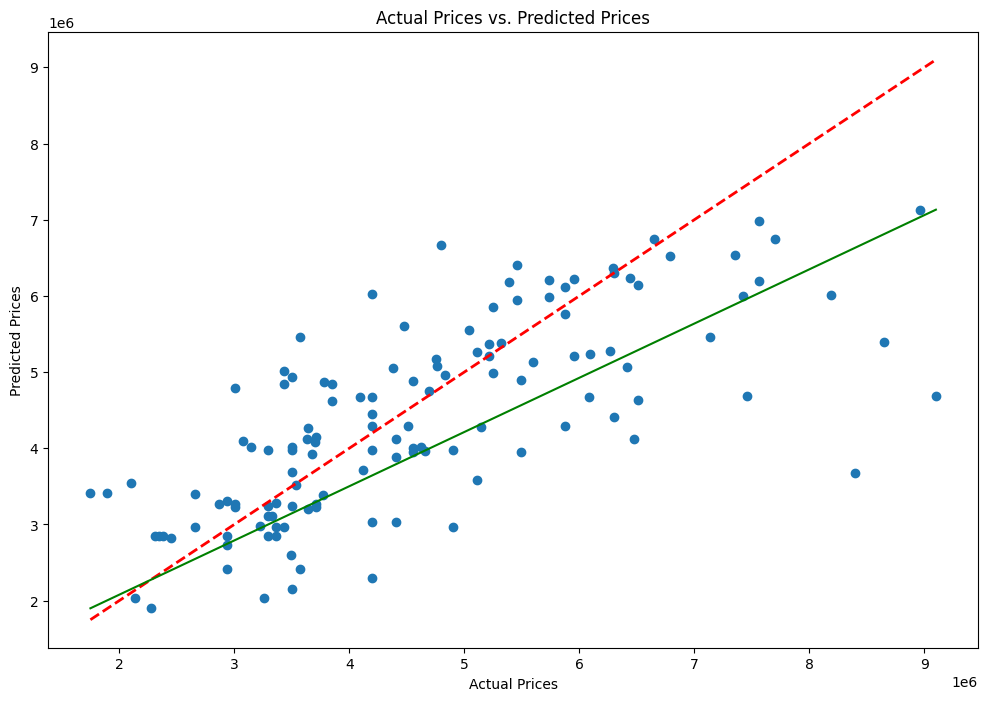

In [8]:
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_pred)

# The perfect prediction line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')

# The regression line
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='green', label='Regression Line')

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

## Interpreting coefficients.

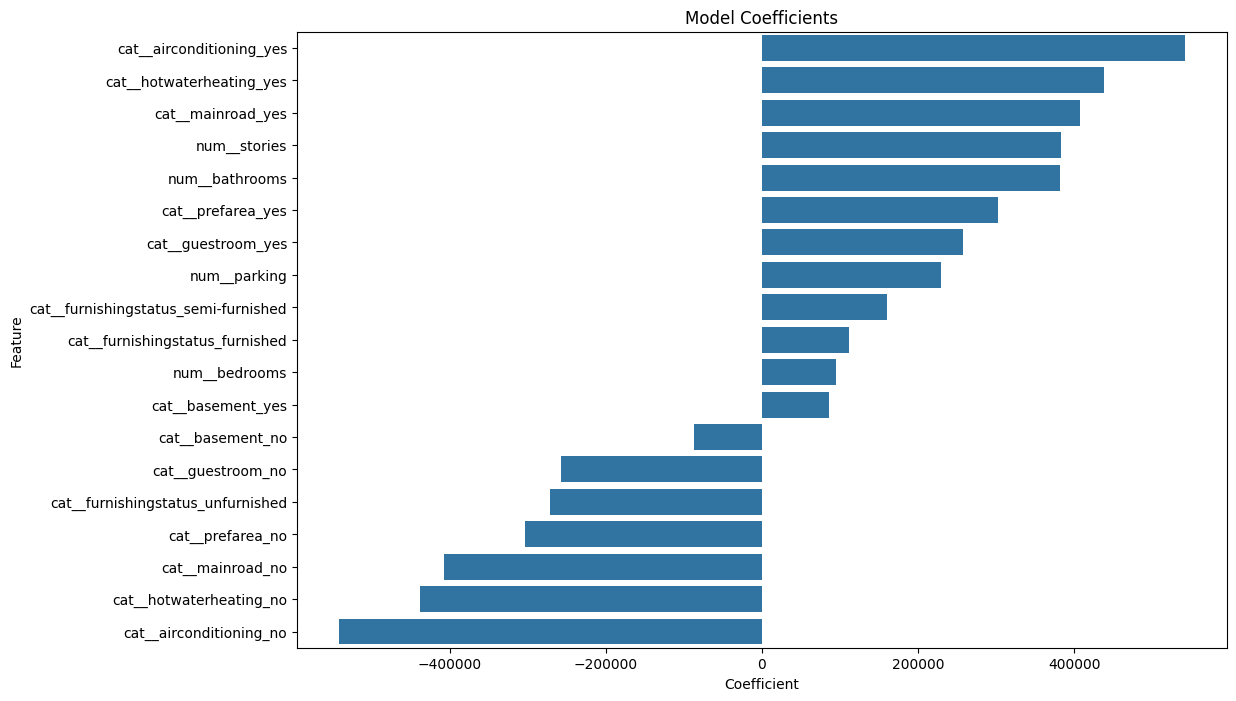

In [9]:
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coefficients)
plt.title('Model Coefficients')
plt.show()